In [51]:
pip install kaggle

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [52]:
import kaggle

In [53]:
!kaggle datasets download akshatagrawal9431/shipment-orders-dataset -f orders_data.csv


Dataset URL: https://www.kaggle.com/datasets/akshatagrawal9431/shipment-orders-dataset
License(s): CC0-1.0
orders_data.csv.zip: Skipping, found more recently modified local copy (use --force to force download)


In [54]:
import pandas as pd

#Extract zip file(zip_ref-->object)


In [55]:


import zipfile
zip_ref = zipfile.ZipFile('orders_data.csv.zip') 
zip_ref.extractall() # extract file to dir

# unzipping the file -> so that the data is extracted then we'll import it 

zip_ref.close() # close file

In [56]:
df=pd.read_csv('orders_data.csv.zip')
df.head()

,Order Id,Order Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub Category,Product Id,cost price,List Price,Quantity,Discount Percent
0,1,01-03-2023,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2
1,2,15-08-2023,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3
2,3,10-01-2023,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,10,10,2,5
3,4,18-06-2022,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,780,960,5,2
4,5,13-07-2022,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,20,20,2,5


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order Id          9994 non-null   int64 
 1   Order Date        9994 non-null   object
 2   Ship Mode         9993 non-null   object
 3   Segment           9994 non-null   object
 4   Country           9994 non-null   object
 5   City              9994 non-null   object
 6   State             9994 non-null   object
 7   Postal Code       9994 non-null   int64 
 8   Region            9994 non-null   object
 9   Category          9994 non-null   object
 10  Sub Category      9994 non-null   object
 11  Product Id        9994 non-null   object
 12  cost price        9994 non-null   int64 
 13  List Price        9994 non-null   int64 
 14  Quantity          9994 non-null   int64 
 15  Discount Percent  9994 non-null   int64 
dtypes: int64(6), object(10)
memory usage: 1.2+ MB


In [58]:
df['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'Not Available', 'unknown',
       'First Class', nan, 'Same Day'], dtype=object)

#to remove (not available) and (unknown) to nan(not available number)
#and create new data frame (df1)

In [59]:

df1=pd.read_csv('orders_data.csv',na_values=['not available','unknown'])
df1['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'Not Available', nan,
       'First Class', 'Same Day'], dtype=object)

In [60]:
#new data frame
df1.head()

,Order Id,Order Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub Category,Product Id,cost price,List Price,Quantity,Discount Percent
0,1,01-03-2023,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2
1,2,15-08-2023,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3
2,3,10-01-2023,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,10,10,2,5
3,4,18-06-2022,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,780,960,5,2
4,5,13-07-2022,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,20,20,2,5


In [61]:
#derive new column like discount,sales price and profit
df.head()

,Order Id,Order Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub Category,Product Id,cost price,List Price,Quantity,Discount Percent
0,1,01-03-2023,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2
1,2,15-08-2023,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3
2,3,10-01-2023,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,10,10,2,5
3,4,18-06-2022,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,780,960,5,2
4,5,13-07-2022,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,20,20,2,5


#name should be in correct form as per table


In [62]:
df1['Selling Price']=df1['List Price']-df1['List Price']*(df1['Discount Percent']/100)
df1['Selling Price']


0       254.8
1       708.1
2         9.5
3       940.8
4        19.0
        ...  
9989     28.8
9990     86.4
9991    254.8
9992     29.1
9993    232.8
Name: Selling Price, Length: 9994, dtype: float64

# to check created new column (selling price)


In [63]:
df1.head(3)

,Order Id,Order Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub Category,Product Id,cost price,List Price,Quantity,Discount Percent,Selling Price
0,1,01-03-2023,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2,254.8
1,2,15-08-2023,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3,708.1
2,3,10-01-2023,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,10,10,2,5,9.5


# to calculate profit


In [64]:
df1['Profit']= (df1['Selling Price']- df1['cost price'])
df1['Profit']

0        14.8
1       108.1
2        -0.5
3       160.8
4        -1.0
        ...  
9989     -1.2
9990     16.4
9991     34.8
9992     -0.9
9993     22.8
Name: Profit, Length: 9994, dtype: float64

In [65]:
df1.head()

,Order Id,Order Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub Category,Product Id,cost price,List Price,Quantity,Discount Percent,Selling Price,Profit
0,1,01-03-2023,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2,254.8,14.8
1,2,15-08-2023,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3,708.1,108.1
2,3,10-01-2023,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,10,10,2,5,9.5,-0.5
3,4,18-06-2022,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,780,960,5,2,940.8,160.8
4,5,13-07-2022,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,20,20,2,5,19.0,-1.0


#change column name


In [66]:
df1.rename(columns={'Profit' : 'Unit_Profit', 'Selling Price' : 'Unit_Selling_Price'}, inplace= True)
df1.head()

,Order Id,Order Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub Category,Product Id,cost price,List Price,Quantity,Discount Percent,Unit_Selling_Price,Unit_Profit
0,1,01-03-2023,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2,254.8,14.8
1,2,15-08-2023,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3,708.1,108.1
2,3,10-01-2023,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,10,10,2,5,9.5,-0.5
3,4,18-06-2022,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,780,960,5,2,940.8,160.8
4,5,13-07-2022,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,20,20,2,5,19.0,-1.0


#to check data type


In [67]:
df1.dtypes

Order Id                int64
Order Date             object
Ship Mode              object
Segment                object
Country                object
City                   object
State                  object
Postal Code             int64
Region                 object
Category               object
Sub Category           object
Product Id             object
cost price              int64
List Price              int64
Quantity                int64
Discount Percent        int64
Unit_Selling_Price    float64
Unit_Profit           float64
dtype: object

#to change data type 

In [68]:

df1['Order Date'] = pd.to_datetime(df1['Order Date'], format='%d-%m-%Y')
df1.dtypes



Order Id                       int64
Order Date            datetime64[ns]
Ship Mode                     object
Segment                       object
Country                       object
City                          object
State                         object
Postal Code                    int64
Region                        object
Category                      object
Sub Category                  object
Product Id                    object
cost price                     int64
List Price                     int64
Quantity                       int64
Discount Percent               int64
Unit_Selling_Price           float64
Unit_Profit                  float64
dtype: object

#droping some columns

In [69]:

df1.drop(columns=['cost price','List Price','Discount Percent'],inplace=True)


In [70]:
df1.head()

,Order Id,Order Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub Category,Product Id,Quantity,Unit_Selling_Price,Unit_Profit
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,2,254.8,14.8
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,3,708.1,108.1
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,2,9.5,-0.5
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,5,940.8,160.8
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,2,19.0,-1.0


calculate total profit in every order

In [71]:

df1['Total profit']=df1['Unit_Profit']*df1['Quantity']

In [72]:

df1.head()

,Order Id,Order Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub Category,Product Id,Quantity,Unit_Selling_Price,Unit_Profit,Total profit
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,2,254.8,14.8,29.6
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,3,708.1,108.1,324.3
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,2,9.5,-0.5,-1.0
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,5,940.8,160.8,804.0
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,2,19.0,-1.0,-2.0


In [73]:

df1.sort_values(by="Total profit",ascending=False)

,Order Id,Order Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub Category,Product Id,Quantity,Unit_Selling_Price,Unit_Profit,Total profit
2697,2698,2023-10-13,Standard Class,Home Office,United States,Jacksonville,Florida,32216,South,Technology,Machines,TEC-MA-10002412,6,21734.4,3624.4,21746.4
6826,6827,2022-08-14,Standard Class,Corporate,United States,Lafayette,Indiana,47905,Central,Technology,Copiers,TEC-CO-10004722,5,16975.0,2975.0,14875.0
9039,9040,2023-02-25,Standard Class,Consumer,United States,Detroit,Michigan,48205,Central,Office Supplies,Binders,OFF-BI-10000545,13,9395.5,985.5,12811.5
4277,4278,2023-01-03,Standard Class,Corporate,United States,Lakewood,New Jersey,8701,East,Technology,Machines,TEC-MA-10001047,7,8827.0,1187.0,8309.0
165,166,2022-10-16,Standard Class,Consumer,United States,San Antonio,Texas,78207,Central,Technology,Machines,TEC-MA-10000822,8,7833.6,983.6,7868.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7929,7930,2022-01-10,First Class,Home Office,United States,Dallas,Texas,75217,Central,Furniture,Tables,FUR-TA-10004767,6,285.0,-5.0,-30.0
4579,4580,2023-07-06,Standard Class,Corporate,United States,New York City,New York,10035,East,Office Supplies,Paper,OFF-PA-10002709,11,67.2,-2.8,-30.8
2567,2568,2023-01-21,Second Class,Consumer,United States,Bellingham,Washington,98226,West,Furniture,Tables,FUR-TA-10003954,9,2536.5,-3.5,-31.5
9121,9122,2022-04-09,Second Class,Corporate,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,OFF-AP-10000358,7,85.5,-4.5,-31.5


In [74]:
df1.groupby('Product Id')

#group by product id and sum the profit to find total profit

In [75]:

df1.groupby('Product Id').sum(['Total Profit']).sort_values(by =['Total profit'], ascending=False).reset_index()['Total profit']



0       24816.0
1       21746.4
2       17867.7
3       15948.0
4       13930.7
         ...   
1857      -35.7
1858      -37.0
1859      -39.5
1860      -44.5
1861      -48.2
Name: Total profit, Length: 1862, dtype: float64

In [76]:
df1.head()

,Order Id,Order Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub Category,Product Id,Quantity,Unit_Selling_Price,Unit_Profit,Total profit
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,2,254.8,14.8,29.6
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,3,708.1,108.1,324.3
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,2,9.5,-0.5,-1.0
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,5,940.8,160.8,804.0
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,2,19.0,-1.0,-2.0


# to check top 10 by profit


In [77]:
df1.head(10).reset_index()[['Product Id','Total profit']].sort_values(by=['Total profit'],ascending=False)

,Product Id,Total profit
3,FUR-TA-10000577,804.0
1,FUR-CH-10000454,324.3
9,OFF-AP-10002892,83.5
0,FUR-BO-10001798,29.6
7,TEC-PH-10002275,27.0
2,OFF-LA-10000240,-1.0
8,OFF-BI-10003910,-1.2
6,OFF-AR-10002833,-1.2
4,OFF-ST-10000760,-2.0
5,FUR-FU-10001487,-10.5


In [78]:
df1['Total Sale']=df1['Unit_Selling_Price']*df1['Quantity']
df1['Total Sale']

0        509.6
1       2124.3
2         19.0
3       4704.0
4         38.0
         ...  
9989      86.4
9990     172.8
9991     509.6
9992     116.4
9993     465.6
Name: Total Sale, Length: 9994, dtype: float64

In [79]:
df1.sort_values(by=['Total Sale'],ascending=False).reset_index()[['Product Id','Total Sale']]

,Product Id,Total Sale
0,TEC-MA-10002412,130406.4
1,OFF-BI-10000545,122141.5
2,TEC-CO-10004722,84875.0
3,TEC-MA-10000822,62668.8
4,TEC-MA-10001047,61789.0
...,...,...
9989,OFF-EN-10002600,0.0
9990,OFF-AR-10000390,0.0
9991,OFF-FA-10000936,0.0
9992,OFF-FA-10001561,0.0


#to group by cities and #to check how many number of cities(unique values)

In [80]:

df1['City'].unique()

df1['City'].nunique()



531

In [81]:
df1['Order Value']= df1['Unit_Selling_Price']* df1['Quantity']
df1['Order Value']

0        509.6
1       2124.3
2         19.0
3       4704.0
4         38.0
         ...  
9989      86.4
9990     172.8
9991     509.6
9992     116.4
9993     465.6
Name: Order Value, Length: 9994, dtype: float64

In [82]:
df1.groupby('Order Id').sum(['Quantity'])

,Postal Code,Quantity,Unit_Selling_Price,Unit_Profit,Total profit,Total Sale,Order Value
Order Id,,,,,,,
1,42420,2,254.8,14.8,29.6,509.6,509.6
2,42420,3,708.1,108.1,324.3,2124.3,2124.3
3,90036,2,9.5,-0.5,-1.0,19.0,19.0
4,33311,5,940.8,160.8,804.0,4704.0,4704.0
5,33311,2,19.0,-1.0,-2.0,38.0,38.0
...,...,...,...,...,...,...,...
9990,33180,3,28.8,-1.2,-3.6,86.4,86.4
9991,92627,2,86.4,16.4,32.8,172.8,172.8
9992,92627,2,254.8,34.8,69.6,509.6,509.6


In [83]:
df1.groupby('Order Id').sum(['Quantity'])[['Order Value', 'Total profit']].reset_index()


,Order Id,Order Value,Total profit
0,1,509.6,29.6
1,2,2124.3,324.3
2,3,19.0,-1.0
3,4,4704.0,804.0
4,5,38.0,-2.0
...,...,...,...
9989,9990,86.4,-3.6
9990,9991,172.8,32.8
9991,9992,509.6,69.6
9992,9993,116.4,-3.6


In [84]:
df1.groupby('Order Id').sum(['Quantity'])[['Order Value', 'Total profit']].reset_index().sort_values(by = ['Total profit'], ascending = False)


,Order Id,Order Value,Total profit
2697,2698,130406.4,21746.4
6826,6827,84875.0,14875.0
9039,9040,122141.5,12811.5
4277,4278,61789.0,8309.0
165,166,62668.8,7868.8
...,...,...,...
7929,7930,1710.0,-30.0
4579,4580,739.2,-30.8
2567,2568,22828.5,-31.5
9121,9122,598.5,-31.5


#take all orders from the "technology" in category and shipment in second class [filter]


In [85]:
df1[(df1['Category']=='Technology')&(df1['Ship Mode']=='Second Class')]

,Order Id,Order Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub Category,Product Id,Quantity,Unit_Selling_Price,Unit_Profit,Total profit,Total Sale,Order Value
19,20,2022-01-11,Second Class,Consumer,United States,San Francisco,California,94109,West,Technology,Phones,TEC-PH-10001949,3,203.7,33.7,101.1,611.1,611.1
26,27,2022-02-08,Second Class,Consumer,United States,Los Angeles,California,90049,West,Technology,Accessories,TEC-AC-10003027,3,87.3,7.3,21.9,261.9,261.9
161,162,2023-11-27,Second Class,Consumer,United States,Philadelphia,Pennsylvania,19134,East,Technology,Accessories,TEC-AC-10003657,2,47.5,7.5,15.0,95.0,95.0
181,182,2022-06-25,Second Class,Corporate,United States,Decatur,Illinois,62521,Central,Technology,Accessories,TEC-AC-10004659,7,397.7,17.7,123.9,2783.9,2783.9
182,183,2022-01-10,Second Class,Home Office,United States,Monroe,Louisiana,71203,South,Technology,Phones,TEC-PH-10003273,4,475.0,5.0,20.0,1900.0,1900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9891,9892,2023-05-21,Second Class,Corporate,United States,Milwaukee,Wisconsin,53209,Central,Technology,Accessories,TEC-AC-10003116,7,116.4,6.4,44.8,814.8,814.8
9892,9893,2023-01-02,Second Class,Corporate,United States,Milwaukee,Wisconsin,53209,Central,Technology,Phones,TEC-PH-10002262,5,291.0,31.0,155.0,1455.0,1455.0
9949,9950,2022-01-07,Second Class,Corporate,United States,Indianapolis,Indiana,46203,Central,Technology,Accessories,TEC-AC-10004568,3,77.6,7.6,22.8,232.8,232.8
9950,9951,2022-03-19,Second Class,Corporate,United States,Indianapolis,Indiana,46203,Central,Technology,Accessories,TEC-AC-10001714,1,38.8,-1.2,-1.2,38.8,38.8


#to find Average order value(total sale)

In [86]:

import numpy as np
np.mean(df1['Total Sale'])


np.float64(1108.5979787872725)

#find the city which contain highest total quantity orders

In [87]:

#first group by city and find a count of quantity
df1.groupby('City').sum('Quantity')['Quantity'].reset_index().sort_values(by=['Quantity'], ascending=False),df1.head(10)


(              City  Quantity
 329  New York City      3417
 266    Los Angeles      2879
 374   Philadelphia      1981
 438  San Francisco      1935
 452        Seattle      1590
 ..             ...       ...
 257    Lindenhurst         1
 221        Jupiter         1
 213      Iowa City         1
 386    Port Orange         1
 140         Elyria         1
 
 [531 rows x 2 columns],
    Order Id Order Date       Ship Mode    Segment        Country  \
 0         1 2023-03-01    Second Class   Consumer  United States   
 1         2 2023-08-15    Second Class   Consumer  United States   
 2         3 2023-01-10    Second Class  Corporate  United States   
 3         4 2022-06-18  Standard Class   Consumer  United States   
 4         5 2022-07-13  Standard Class   Consumer  United States   
 5         6 2022-03-13   Not Available   Consumer  United States   
 6         7 2022-12-28  Standard Class   Consumer  United States   
 7         8 2022-01-25  Standard Class   Consumer  United St

#to rank the orders  by each region by quantity 

In [88]:

df1[['Order Id','Region','Quantity']].sort_values(by=['Region','Quantity'],ascending=[True,False])

,Order Id,Region,Quantity
660,661,Central,14
1045,1046,Central,14
7387,7388,Central,14
8074,8075,Central,14
9515,9516,Central,14
...,...,...,...
9752,9753,West,1
9838,9839,West,1
9902,9903,West,1
9953,9954,West,1


to find the total orders by first quater of the year

In [89]:

df1['Month']=df1['Order Date'].dt.month

df1[df1['Month'].isin([1,2,3])].head()

,Order Id,Order Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub Category,Product Id,Quantity,Unit_Selling_Price,Unit_Profit,Total profit,Total Sale,Order Value,Month
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,2,254.8,14.8,29.6,509.6,509.6,3
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,2,9.5,-0.5,-1.0,19.0,19.0,1
5,6,2022-03-13,Not Available,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,FUR-FU-10001487,7,48.5,-1.5,-10.5,339.5,339.5,3
7,8,2022-01-25,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,TEC-PH-10002275,6,864.5,4.5,27.0,5187.0,5187.0,1
8,9,2023-03-23,Not Available,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,OFF-BI-10003910,3,19.6,-0.4,-1.2,58.8,58.8,3


In [90]:
df1['Year']=df1['Order Date'].dt.year
df1['Year']

0       2023
1       2023
2       2023
3       2022
4       2022
        ... 
9989    2023
9990    2023
9991    2022
9992    2022
9993    2022
Name: Year, Length: 9994, dtype: int32

In [91]:
df1['Quarter'] = df1['Order Date'].dt.quarter
df1.head()

,Order Id,Order Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,...,Product Id,Quantity,Unit_Selling_Price,Unit_Profit,Total profit,Total Sale,Order Value,Month,Year,Quarter
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,...,FUR-BO-10001798,2,254.8,14.8,29.6,509.6,509.6,3,2023,1
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,...,FUR-CH-10000454,3,708.1,108.1,324.3,2124.3,2124.3,8,2023,3
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,...,OFF-LA-10000240,2,9.5,-0.5,-1.0,19.0,19.0,1,2023,1
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,...,FUR-TA-10000577,5,940.8,160.8,804.0,4704.0,4704.0,6,2022,2
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,...,OFF-ST-10000760,2,19.0,-1.0,-2.0,38.0,38.0,7,2022,3


In [92]:
temp_df =  df1.groupby(['Year','Quarter']).sum('Total_Sale')['Total Sale'].reset_index()
temp_df

,Year,Quarter,Total Sale
0,2022,1,1275547.6
1,2022,2,1355326.7
2,2022,3,1343727.8
3,2022,4,1500939.2
4,2023,1,1559456.2
5,2023,2,1282878.4
6,2023,3,1308164.5
7,2023,4,1453287.8


# to find top 6 highest profit producing product

In [93]:

df1.groupby('Product Id').sum('Total profit').sort_values(by=['Total profit'],ascending=False).head(6).reset_index()


,Product Id,Order Id,Postal Code,Quantity,Unit_Selling_Price,Unit_Profit,Total profit,Total Sale,Order Value,Month,Year,Quarter
0,TEC-CO-10004722,28222,194875,20,59514.0,5644.0,24816.0,245056.0,245056.0,39,10112,15
1,TEC-MA-10002412,2698,32216,6,21734.4,3624.4,21746.4,130406.4,130406.4,10,2023,4
2,OFF-BI-10000545,57937,302599,48,18249.0,1959.0,17867.7,163777.7,163777.7,43,18204,17
3,TEC-CO-10001449,41444,428939,38,18151.2,2631.2,15948.0,107388.0,107388.0,81,16181,30
4,FUR-CH-10002024,44560,448062,39,21096.2,2246.2,13930.7,120090.7,120090.7,61,16179,23
5,OFF-BI-10003527,61859,562064,31,26525.3,3435.3,12792.9,97082.9,97082.9,78,20226,29


to find the top 5 highest selling product in each region

In [94]:

df1.groupby(['Region', 'Product Id']).sum('Quantity')['Quantity'].reset_index().sort_values(by=['Region', 'Quantity'], ascending = [True, False])



,Region,Product Id,Quantity
461,Central,OFF-BI-10000301,34
474,Central,OFF-BI-10000756,33
470,Central,OFF-BI-10000546,29
491,Central,OFF-BI-10001249,29
61,Central,FUR-CH-10002304,27
...,...,...,...
5219,West,TEC-PH-10002185,1
5227,West,TEC-PH-10002447,1
5229,West,TEC-PH-10002483,1
5256,West,TEC-PH-10003357,1


# to find total sale in each region

In [95]:


df1.groupby('Region').sum('Total Sale')

,Order Id,Postal Code,Quantity,Unit_Selling_Price,Unit_Profit,Total profit,Total Sale,Order Value,Month,Year,Quarter
Region,,,,,,,,,,,
Central,11685963,151786150,8780,483668.6,46378.6,236121.2,2387881.2,2387881.2,15256,4698281,5875
East,14073919,50171698,10618,654320.0,58220.0,295773.8,3257983.8,3257983.8,18605,5760082,7169
South,8213295,55875052,6209,378011.5,38011.5,202743.6,1966053.6,1966053.6,10427,3276428,4026
West,15971838,293739752,12266,699858.6,62558.6,305289.6,3467409.6,3467409.6,20732,6478034,8023


In [96]:
# to build charts



In [97]:
import seaborn as sns
import matplotlib.pyplot as plt

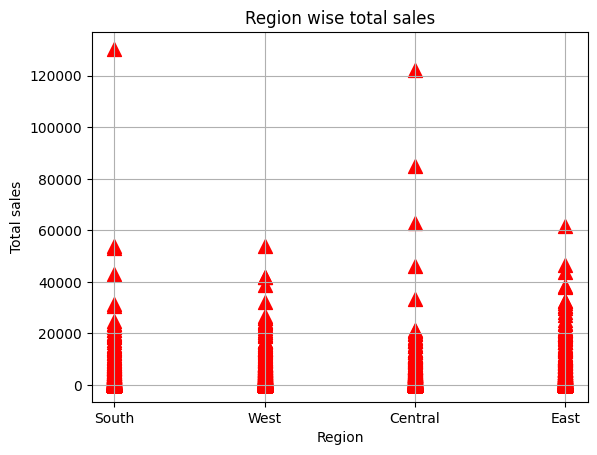

In [98]:
# scatter chat region by total sales

plt.scatter('Region','Total Sale',data=df1, s=100,  # Marker size
            c='red',  # Marker color
            marker='^',  # Marker shape (triangle)
            label='Data Points')

plt.xlabel('Region')
plt.ylabel('Total sales')
plt.title('Region wise total sales')
plt.grid(True)  

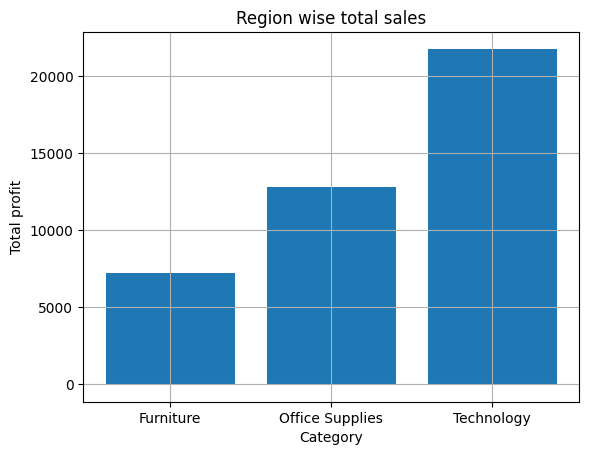

In [99]:
plt.bar('Category','Total profit',data=df1,label='data points')
plt.xlabel('Category')
plt.ylabel('Total profit')
plt.title('Region wise total sales')
plt.grid(True) 

